In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Wholesale customers data.csv')

In [2]:
data = pd.read_csv('/content/Wholesale customers data.csv')

In [3]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv("Wholesale customers data.csv")
df_numeric = df.drop(columns=['Channel', 'Region'])


In [6]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [7]:
# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

In [9]:
# Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(df_scaled)

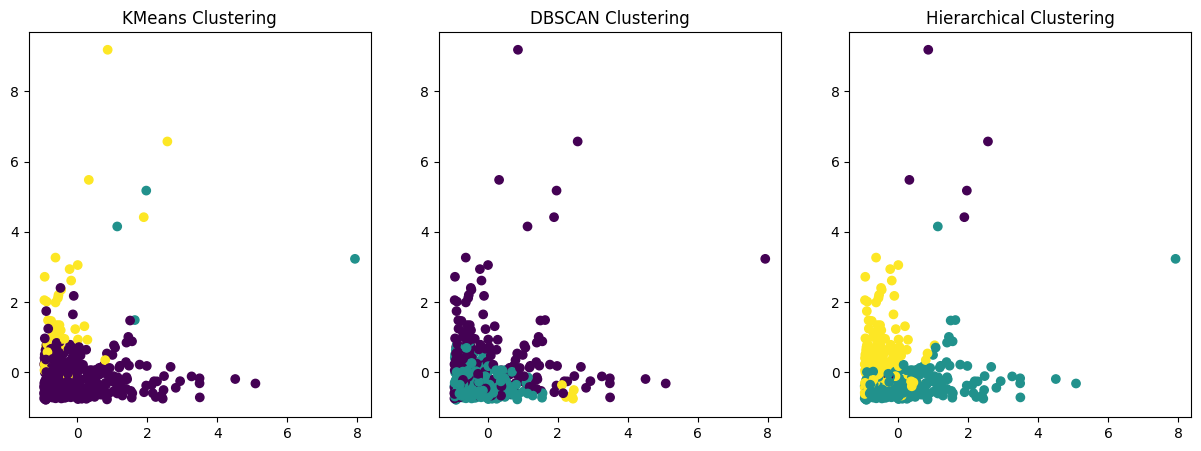

In [10]:
# Visualize the clusters
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')

plt.subplot(1, 3, 2)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(1, 3, 3)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=agg_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Read the dataset
df = pd.read_csv("Wholesale customers data.csv")

In [13]:
# Drop non-numeric columns if any
df_numeric = df.drop(columns=['Channel', 'Region'])

In [14]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [15]:
# Find the optimum number of clusters for KMeans using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

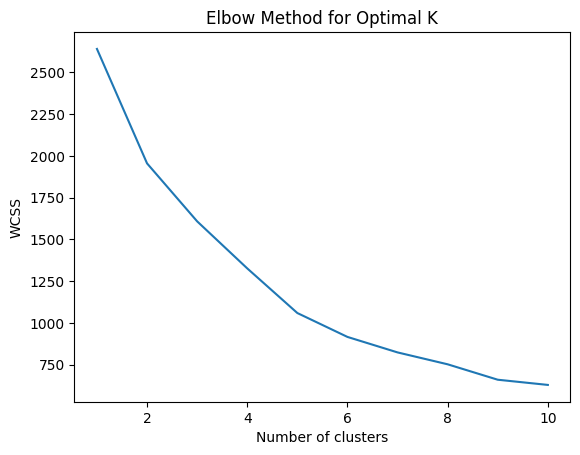

In [16]:
# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# From the elbow curve, determine the optimal number of clusters for KMeans
optimal_k = 3  # Adjust as needed
print("Optimal number of clusters for KMeans:", optimal_k)

Optimal number of clusters for KMeans: 3


In [18]:
# Create the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


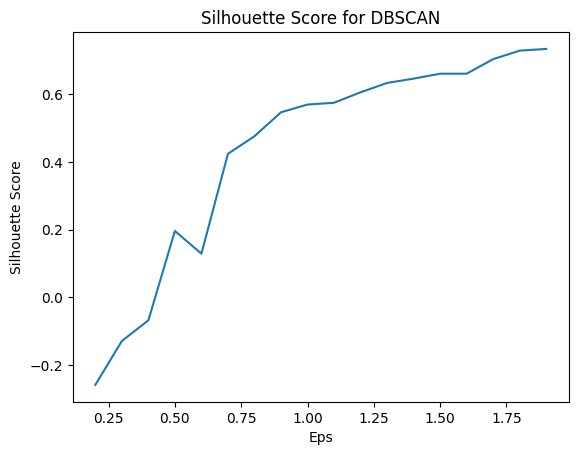

Optimal epsilon for DBSCAN: 1.9000000000000001


In [19]:
# Find the optimum number of clusters for DBSCAN using silhouette score
silhouette_scores = []
for eps in np.arange(0.1, 2.0, 0.1):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(df_scaled)
    if len(np.unique(dbscan_labels)) > 1:  # Silhouette score requires at least 2 clusters
        silhouette_scores.append((eps, silhouette_score(df_scaled, dbscan_labels)))

        # Plot silhouette scores
eps_values, silhouette_scores = zip(*silhouette_scores)
plt.plot(eps_values, silhouette_scores)
plt.title('Silhouette Score for DBSCAN')
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.show()
# From the silhouette score, determine the optimal number of clusters for DBSCAN
optimal_eps = eps_values[np.argmax(silhouette_scores)]
print("Optimal epsilon for DBSCAN:", optimal_eps)

In [20]:
# Create the DBSCAN model with the optimal number of clusters
dbscan = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

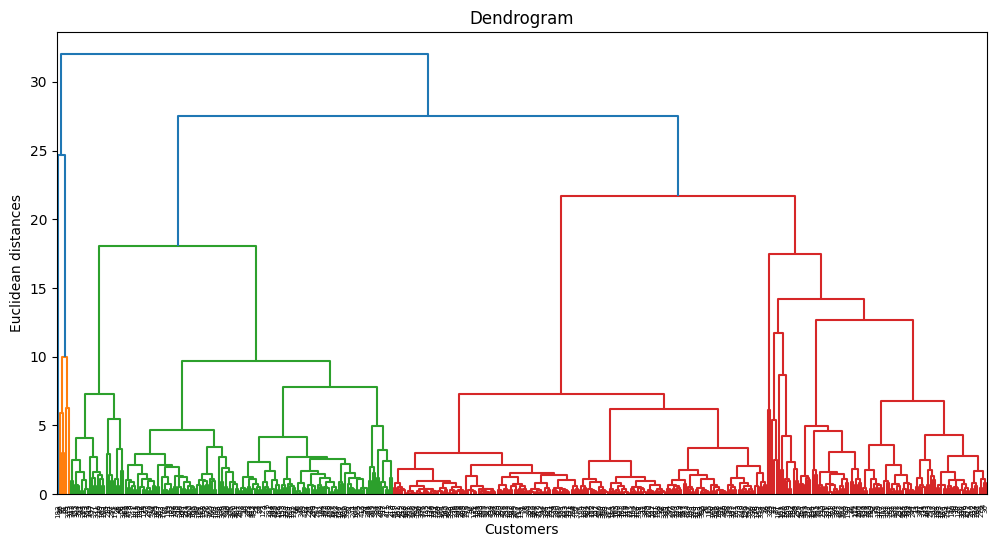

In [21]:
# Hierarchical clustering using dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [22]:
# From the dendrogram, determine the optimal number of clusters for hierarchical clustering
optimal_clusters = 3  # Adjust as needed
print("Optimal number of clusters for hierarchical clustering:", optimal_clusters)

# Create the hierarchical clustering model with the optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters)
agg_labels = agg_clustering.fit_predict(df_scaled)


Optimal number of clusters for hierarchical clustering: 3


In [23]:
# Drop non-numeric columns if any
df_numeric = df.drop(columns=['Channel', 'Region'])

In [24]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [25]:
# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

In [27]:
# Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(df_scaled)

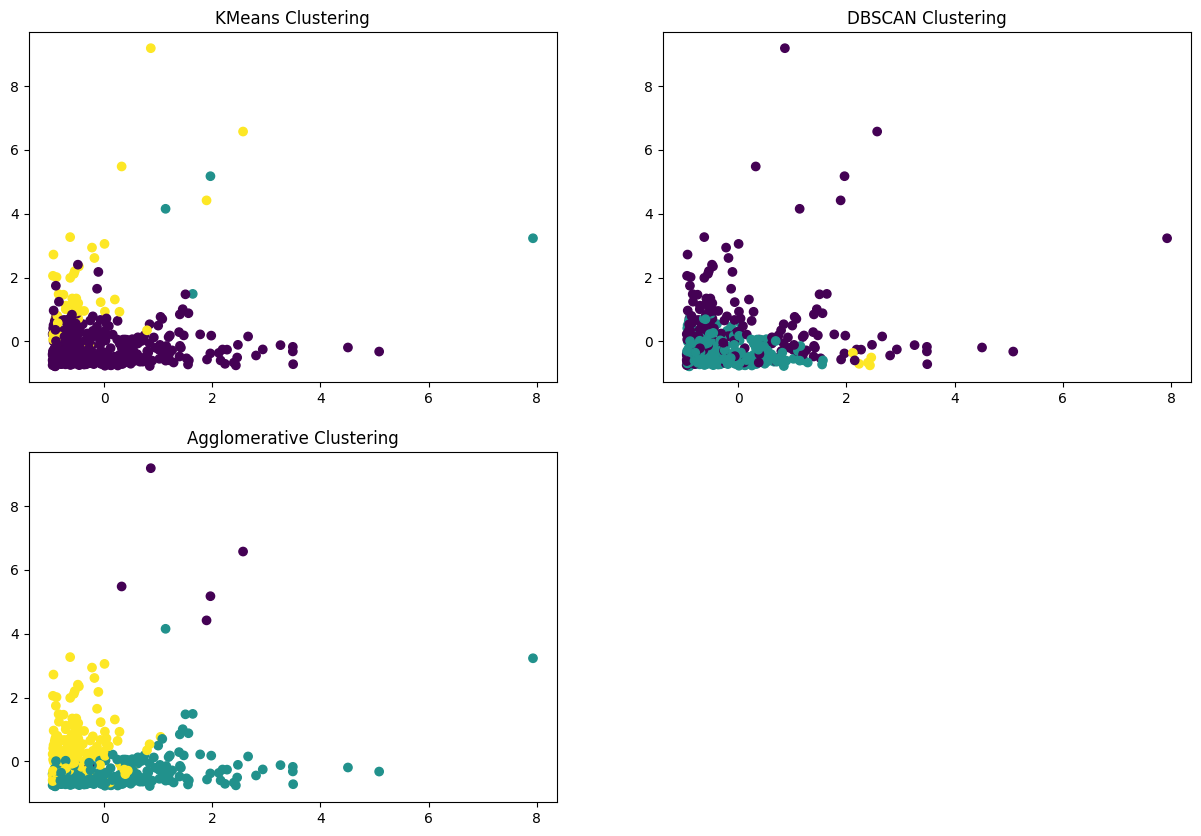

In [28]:
# Visualize the clusters
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')

plt.subplot(2, 2, 2)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(2, 2, 3)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering')


plt.show()


In [29]:
print("KMeans Clustering Labels:")
print(kmeans_labels)

KMeans Clustering Labels:
[0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 2 2 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 2 0
 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]


In [30]:
# Print the output of DBSCAN clustering
print("\nDBSCAN Clustering Labels:")
print(dbscan_labels)


DBSCAN Clustering Labels:
[ 0  0 -1  0 -1  0  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1  0  0  0  0 -1 -1
 -1  0  0  0 -1  1 -1  0  0 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0 -1  0  0 -1  0  0  0 -1 -1  0  0  0 -1 -1 -1  0 -1 -1 -1 -1  0 -1 -1
 -1 -1  0  0 -1 -1  0  0  0  0  0  0  0 -1 -1 -1  0 -1  0  0 -1 -1  0  0
 -1  0  0  0 -1 -1  0 -1  0  0  0 -1  0 -1  0 -1 -1  0  0  0  0  0  0  0
  0  0  0 -1 -1 -1  0 -1  0  1  0  0  0  0  0  0 -1 -1 -1  0  0 -1 -1  0
  0 -1  0  0  0  0  0  0  0 -1  0 -1 -1  0  0  0  0  0  0 -1 -1 -1 -1  0
  0  0  0 -1  0 -1  0  0 -1 -1  0 -1  0 -1  0 -1  0  0  0 -1 -1  0 -1  0
  0 -1  0  0 -1  0  0  0 -1 -1 -1  0  0 -1  0 -1  0 -1  0 -1  0  0  0 -1
 -1  0 -1  0  0  0  0  0  0  0  0  0 -1  0 -1 -1  0  0  0  0  0  0  0 -1
 -1  0  0  0  0 -1  0  0  0  0  0 -1  0 -1 -1  0  0 -1 -1 -1  0  0  0 -1
  0 -1 -1 -1 -1  0  0  0 -1 -1  0  0 -1 -1  0  0  0  0 -1 -1 -1  1  0  0
  0  1  0  0  0  0 -1  0  0  0  0  0  0 -1  0 -1 -1 -1 -1  0  0 -1 -1 -1
 -1  0  0 -1  0  0  0 -1

In [31]:
# Print the output of Agglomerative clustering
print("\nAgglomerative Clustering Labels:")
print(agg_labels)


Agglomerative Clustering Labels:
[2 2 2 1 1 2 2 2 1 2 2 1 1 1 1 1 2 2 1 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1
 2 2 1 1 1 2 2 2 2 2 0 2 2 1 1 1 2 1 1 2 2 1 2 2 0 2 2 1 2 2 1 1 1 1 1 1 1
 2 1 1 2 1 1 1 2 2 1 2 0 0 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 2 1 1 1 2 2 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1
 1 1 1 1 1 2 1 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 2 2 1 2 1 1 2 1 1 1 2 0 1
 2 1 2 2 2 1 1 1 2 1 1 1 2 1 1 2 2 2 1 1 2 1 2 2 2 1 2 1 2 2 2 2 1 2 1 1 2
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 2 2 1 1 2 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1
 0 1 1 1 1 1 1 2 2 2 2 1 2 2 1 1 2 1 2 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 2 2 1 2 2 1 1 2 2 2 2 1 2 1 1 2 2 1 2 1 1 1 2 1 1 1 2 1 1 2 1 1]


3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters.

In [32]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [33]:
# Function to find the optimal number of clusters for KMeans using the elbow method
def find_optimal_kmeans(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method for Optimal K (KMeans)')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

In [34]:
# Function to find the optimal number of clusters for DBSCAN using silhouette score
def find_optimal_dbscan(X):
    silhouette_scores = []
    for eps in np.arange(0.1, 2.0, 0.1):
        dbscan = DBSCAN(eps=eps, min_samples=5)
        dbscan_labels = dbscan.fit_predict(X)
        if len(np.unique(dbscan_labels)) > 1:
            silhouette_scores.append((eps, silhouette_score(X, dbscan_labels)))
    silhouette_scores = np.array(silhouette_scores)
    optimal_eps = silhouette_scores[np.argmax(silhouette_scores[:, 1]), 0]
    print("Optimal epsilon for DBSCAN:", optimal_eps)

In [35]:
# Function to find the optimal number of clusters for Agglomerative Clustering using Davies-Bouldin index
def find_optimal_agg(X):
    scores = []
    for n_clusters in range(2, 11):
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
        labels = agg_clustering.fit_predict(X)
        score = davies_bouldin_score(X, labels)
        scores.append((n_clusters, score))
    scores = np.array(scores)
    optimal_n_clusters = scores[np.argmin(scores[:, 1]), 0]
    print("Optimal number of clusters for Agglomerative Clustering:", optimal_n_clusters)

In [36]:
# Read the dataset
df = pd.read_csv("Wholesale customers data.csv")

In [37]:
# Drop non-numeric columns if any
df_numeric = df.drop(columns=['Channel', 'Region'])

In [38]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

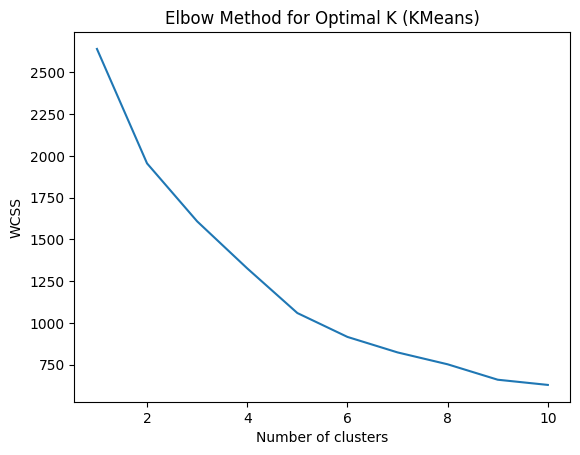

Optimal epsilon for DBSCAN: 1.9000000000000001
Optimal number of clusters for Agglomerative Clustering: 10.0


In [39]:
# Find and visualize the optimal number of clusters for each model
find_optimal_kmeans(df_scaled)
find_optimal_dbscan(df_scaled)
find_optimal_agg(df_scaled)

4. Perform DBSCAN Clustering
4. Also perform PCA for Dimensionality reduction.

In [40]:
# Drop non-numeric columns if any
df_numeric = df.drop(columns=['Channel', 'Region'])

In [41]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [42]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

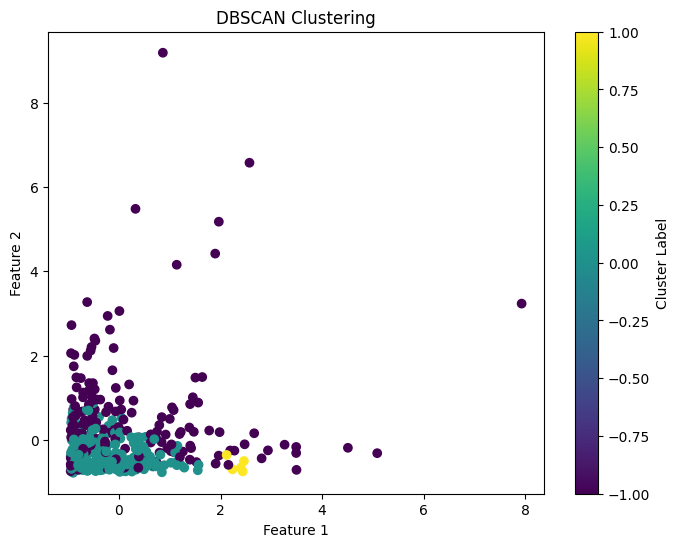

In [43]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [44]:
# Output the cluster labels
print("DBSCAN Clustering Labels:")
print(dbscan_labels)

DBSCAN Clustering Labels:
[ 0  0 -1  0 -1  0  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1  0  0  0  0 -1 -1
 -1  0  0  0 -1  1 -1  0  0 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0 -1  0  0 -1  0  0  0 -1 -1  0  0  0 -1 -1 -1  0 -1 -1 -1 -1  0 -1 -1
 -1 -1  0  0 -1 -1  0  0  0  0  0  0  0 -1 -1 -1  0 -1  0  0 -1 -1  0  0
 -1  0  0  0 -1 -1  0 -1  0  0  0 -1  0 -1  0 -1 -1  0  0  0  0  0  0  0
  0  0  0 -1 -1 -1  0 -1  0  1  0  0  0  0  0  0 -1 -1 -1  0  0 -1 -1  0
  0 -1  0  0  0  0  0  0  0 -1  0 -1 -1  0  0  0  0  0  0 -1 -1 -1 -1  0
  0  0  0 -1  0 -1  0  0 -1 -1  0 -1  0 -1  0 -1  0  0  0 -1 -1  0 -1  0
  0 -1  0  0 -1  0  0  0 -1 -1 -1  0  0 -1  0 -1  0 -1  0 -1  0  0  0 -1
 -1  0 -1  0  0  0  0  0  0  0  0  0 -1  0 -1 -1  0  0  0  0  0  0  0 -1
 -1  0  0  0  0 -1  0  0  0  0  0 -1  0 -1 -1  0  0 -1 -1 -1  0  0  0 -1
  0 -1 -1 -1 -1  0  0  0 -1 -1  0  0 -1 -1  0  0  0  0 -1 -1 -1  1  0  0
  0  1  0  0  0  0 -1  0  0  0  0  0  0 -1  0 -1 -1 -1 -1  0  0 -1 -1 -1
 -1  0  0 -1  0  0  0 -1 

In [45]:
# Drop non-numeric columns if any
df_numeric = df.drop(columns=['Channel', 'Region'])

In [46]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [55]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)

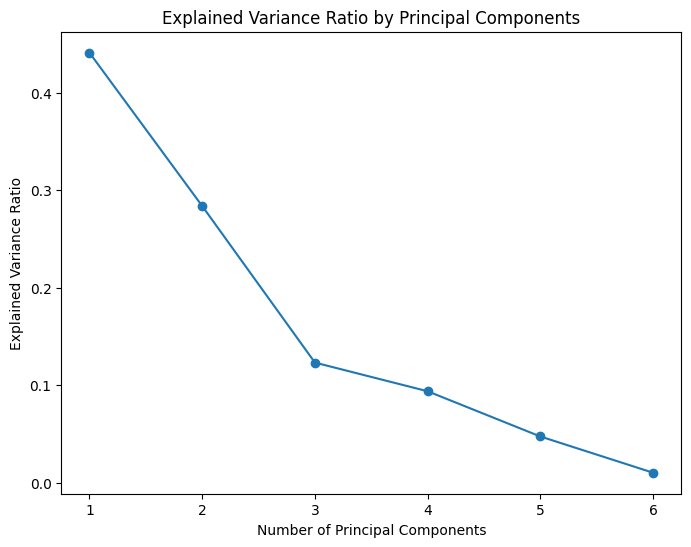

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
data = pd.read_csv('Wholesale customers data.csv')
X = data.drop(columns=['Channel', 'Region'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()
